Worked with:
- Trevor Mathisen
- Viet Nguyen

1. Perform full EDA on fish dataset (FishDataset.csv provided under ML data bank on Canvas). Assume the weight column to be the output and the rest of columns as inputs. Column zero (categorical data) should be converted to numbers using encoding (use preprocessing.LabelEncoder() from sklearn library).

In [59]:
from numpy import set_printoptions, logspace, mean, std
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import seaborn as sns

In [45]:
filename = 'FishDataset.csv'
data = read_csv(filename)
set_printoptions(precision=3)
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5,4.0
1,Bream,290.0,24.0,26.3,31.2,12.5,4.3
2,Bream,340.0,23.9,26.5,31.1,12.4,4.7
3,Bream,363.0,26.3,29.0,33.5,12.7,4.5
4,Bream,430.0,26.5,29.0,34.0,12.4,5.1


In [46]:
print(data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [47]:
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
print(data['Species'].value_counts())

Species
2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: count, dtype: int64


In [48]:
array = data.values
Y1 = data['Weight']
X1 = data.drop('Weight', axis=1)
X1names = X1.columns

In [49]:
data_norm = X1.copy()
# Normalize
norm_scaler = Normalizer().fit(data_norm)
data_norm = norm_scaler.transform(data_norm)
# add output to normalized data
data_norm = pd.DataFrame(data_norm, columns=X1names, index=X1.index)
X1_norm = data_norm.copy()
#data_norm['Weight'] = Y1

data_stand = X1.copy()
# Standardize
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand, columns=X1names, index=X1.index)
X1_stand = data_stand.copy()
#data_stand['Weight'] = Y1
data_objects = ((data_norm, 'data_norm'), (data_stand, 'data_stand'), (data, "data_raw"))

In [50]:
# Descriptive stats
set_option('display.width', 100)
set_option('display.precision', 1)
for data, name in data_objects:
    print(f"Data: {name}")
    print(data.describe())

Data: data_norm
       Species  Length1  Length2  Length3   Height    Width
count  1.6e+02  1.6e+02  1.6e+02  1.6e+02  1.6e+02  1.6e+02
mean   6.0e-02  5.1e-01  5.6e-01  6.1e-01  1.7e-01  8.6e-02
std    6.5e-02  1.4e-02  1.3e-02  1.1e-02  5.3e-02  1.4e-02
min    0.0e+00  4.9e-01  5.4e-01  5.9e-01  8.9e-02  5.2e-02
25%    2.6e-02  5.0e-01  5.5e-01  6.0e-01  1.5e-01  8.3e-02
50%    4.2e-02  5.2e-01  5.6e-01  6.1e-01  1.7e-01  8.9e-02
75%    8.2e-02  5.3e-01  5.7e-01  6.2e-01  2.3e-01  9.4e-02
max    2.8e-01  5.4e-01  5.8e-01  6.3e-01  2.8e-01  1.3e-01
Data: data_stand
       Species  Length1  Length2  Length3   Height    Width
count  1.6e+02  1.6e+02  1.6e+02  1.6e+02  1.6e+02  1.6e+02
mean   2.2e-17 -1.1e-16 -1.5e-16 -7.8e-17  4.5e-17 -2.8e-16
std    1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00
min   -1.3e+00 -1.9e+00 -1.9e+00 -1.9e+00 -1.7e+00 -2.0e+00
25%   -7.4e-01 -7.2e-01 -6.9e-01 -7.0e-01 -7.1e-01 -6.1e-01
50%   -1.6e-01 -1.1e-01 -1.0e-01 -1.6e-01 -2.8e-01 -1.0e-01
75%    

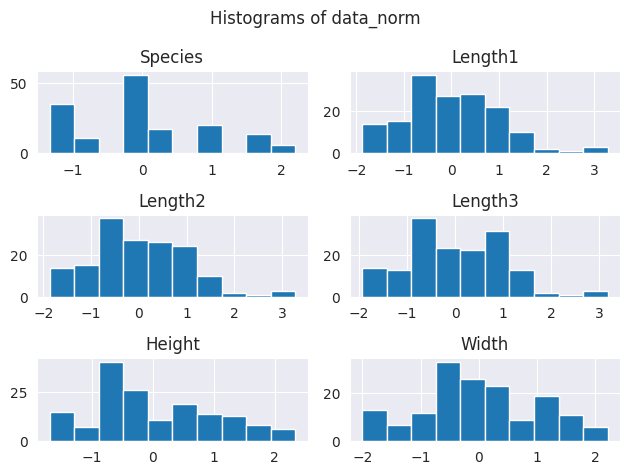

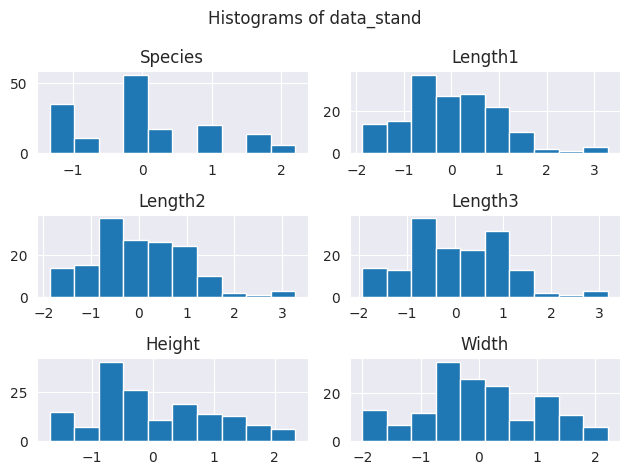

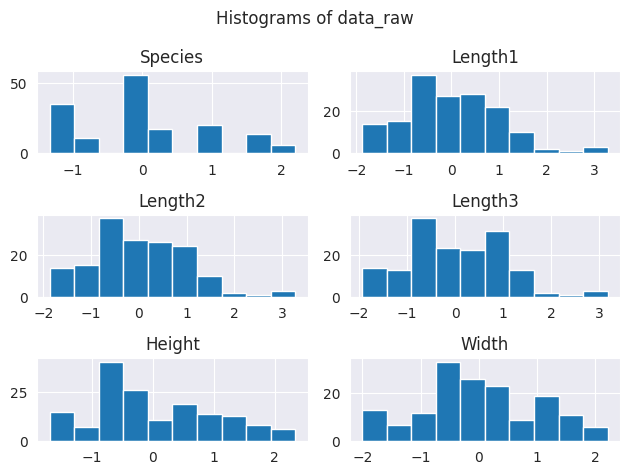

In [51]:
# Histograms
for data, name in data_objects:
    data_stand.hist()
    plt.suptitle(f"Histograms of {name}")
    plt.tight_layout()
    plt.show()

         Species  Length1  Length2  Length3  Height    Width
Species  1.0e+00      0.2 -1.3e-02 -4.1e-01    -0.6 -4.4e-01
Length1  2.4e-01      1.0  8.5e-01 -7.8e-01    -0.8 -2.1e-01
Length2 -1.3e-02      0.8  1.0e+00 -6.9e-01    -0.7  6.9e-02
Length3 -4.1e-01     -0.8 -6.9e-01  1.0e+00     0.6  3.2e-02
Height  -6.1e-01     -0.8 -6.6e-01  6.3e-01     1.0  5.0e-01
Width   -4.4e-01     -0.2  6.9e-02  3.2e-02     0.5  1.0e+00


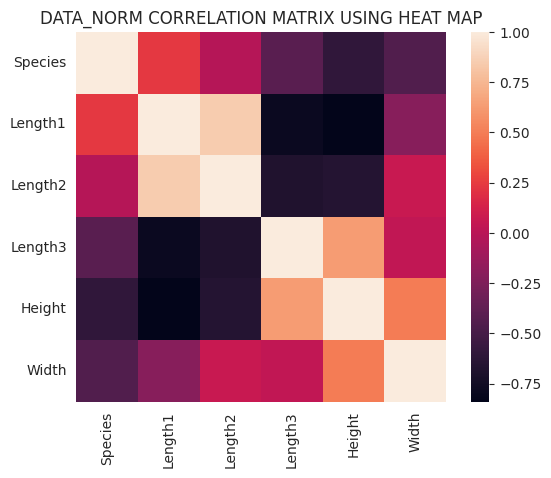

<Figure size 640x480 with 0 Axes>

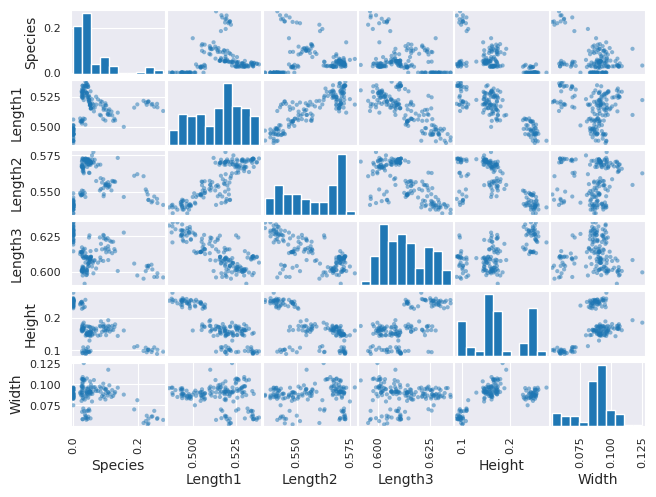

         Species  Length1  Length2  Length3  Height    Width
Species  1.0e+00      0.2 -1.3e-02 -4.1e-01    -0.6 -4.4e-01
Length1  2.4e-01      1.0  8.5e-01 -7.8e-01    -0.8 -2.1e-01
Length2 -1.3e-02      0.8  1.0e+00 -6.9e-01    -0.7  6.9e-02
Length3 -4.1e-01     -0.8 -6.9e-01  1.0e+00     0.6  3.2e-02
Height  -6.1e-01     -0.8 -6.6e-01  6.3e-01     1.0  5.0e-01
Width   -4.4e-01     -0.2  6.9e-02  3.2e-02     0.5  1.0e+00


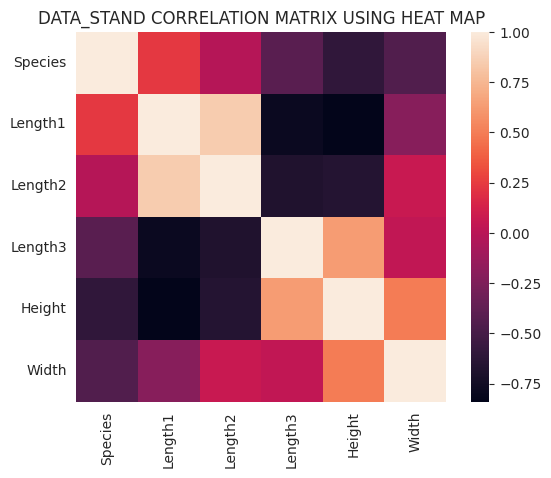

<Figure size 640x480 with 0 Axes>

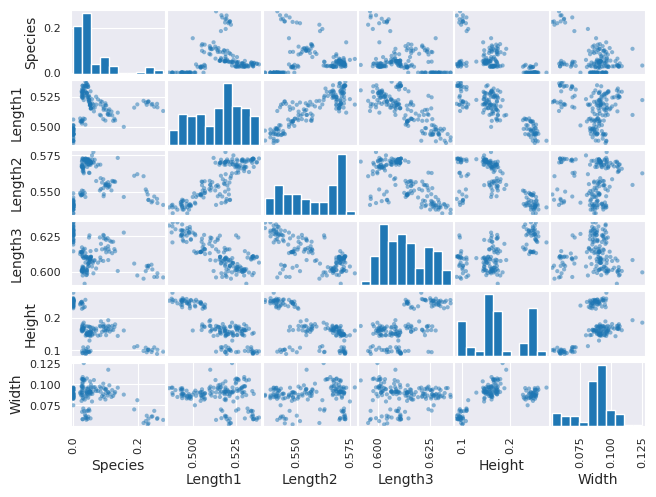

         Species  Length1  Length2  Length3  Height    Width
Species  1.0e+00      0.2 -1.3e-02 -4.1e-01    -0.6 -4.4e-01
Length1  2.4e-01      1.0  8.5e-01 -7.8e-01    -0.8 -2.1e-01
Length2 -1.3e-02      0.8  1.0e+00 -6.9e-01    -0.7  6.9e-02
Length3 -4.1e-01     -0.8 -6.9e-01  1.0e+00     0.6  3.2e-02
Height  -6.1e-01     -0.8 -6.6e-01  6.3e-01     1.0  5.0e-01
Width   -4.4e-01     -0.2  6.9e-02  3.2e-02     0.5  1.0e+00


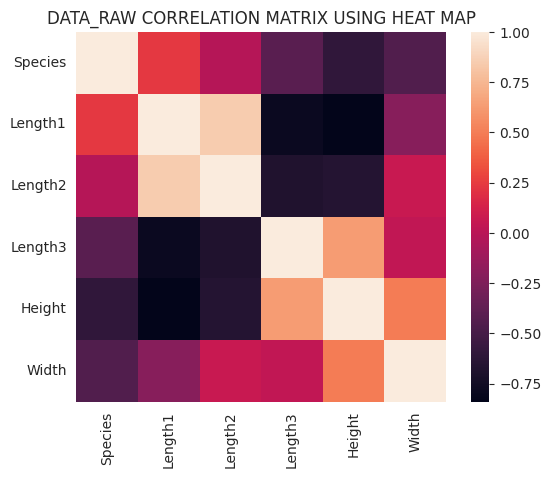

<Figure size 640x480 with 0 Axes>

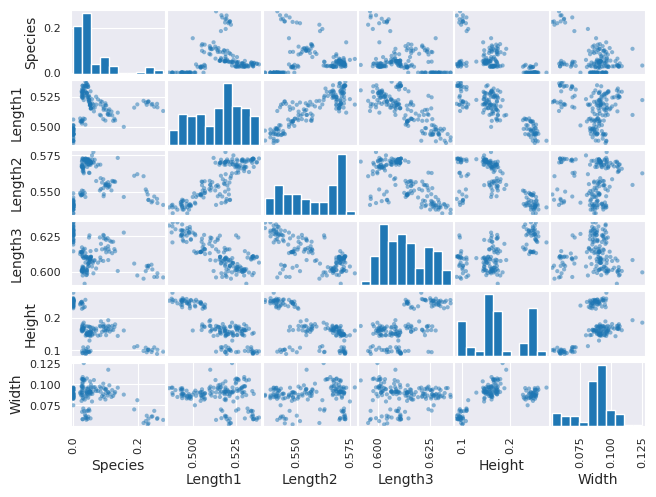

In [52]:
for data, name in data_objects:
    plt.figure() # new plot
    #plt.tight_layout()
    corMat = data_norm.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"{name.upper()} CORRELATION MATRIX USING HEAT MAP")
    plt.show()
    
    ## scatter plot of all data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    scatter_matrix(data_norm)
    plt.tight_layout(pad=0.1)
    plt.show()

In [53]:
model = LinearRegression()

rfe_6 = RFE(model, n_features_to_select=6)
rfe_6.fit(data_stand, Y1)
features_6 = X1names[rfe_6.support_]

rfe_5 = RFE(model, n_features_to_select=5)
rfe_5.fit(data_stand, Y1)
features_5 = X1names[rfe_5.support_]

rfe_4 = RFE(model, n_features_to_select=4)
rfe_4.fit(data_stand, Y1)
features_4 = X1names[rfe_4.support_]


print("Features selected for 6-feature model:", features_6.tolist())
print("Features selected for 5-feature model:", features_5.tolist())
print("Features selected for 4-feature model:", features_4.tolist())

Features selected for 6-feature model: ['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
Features selected for 5-feature model: ['Species', 'Length1', 'Length2', 'Length3', 'Height']
Features selected for 4-feature model: ['Length1', 'Length2', 'Length3', 'Height']


In [54]:
# Prepare models for cross-validation
models = []

# Add basic linear models with different feature counts
X_6 = data_stand[features_6]
X_5 = data_stand[features_5]
X_4 = data_stand[features_4]

models.append(('X_6', model, X_6))
models.append(('X_5', model, X_5))
models.append(('X_4', model, X_4))

In [55]:
def find_best_alpha(X_data, y_data, model_type: str) -> float:
    """
    Find the best alpha value for regularization using grid search.

    Args:
        X_data: Feature matrix
        y_data: Target vector
        model_type: Type of model ('ridge' or 'lasso')

    Returns:
        Best alpha value found by grid search
    """
    # Wider range of alphas with more values
    alphas = logspace(-4, 4, 20)  # 20 values from 0.0001 to 10000
    param_grid = {'alpha': alphas}

    if model_type == 'ridge':
        model = Ridge(max_iter=10000, tol=0.001)
    else:  # lasso
        model = Lasso(max_iter=50000, tol=0.001, warm_start=True)

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_data, y_data)

    best_alpha = grid_search.best_params_['alpha']
    best_score = grid_search.best_score_

    print(f"{model_type.capitalize()} model with {X_data.shape[1]} features: Best alpha = {best_alpha}, Score = {best_score:.4f}")

    # Print top 3 alpha values and their scores
    results = pd.DataFrame(grid_search.cv_results_)
    top_indices = results['rank_test_score'].sort_values().head(3).index
    for idx in top_indices:
        alpha = results.loc[idx, 'param_alpha']
        score = results.loc[idx, 'mean_test_score']
        print(f"  Alpha: {alpha:.6f}, Score: {score:.4f}")

    return best_alpha

In [56]:
# Find best alphas for each feature set and model type
ridge_alpha_6 = find_best_alpha(X_6, Y1, 'ridge')
ridge_alpha_5 = find_best_alpha(X_5, Y1, 'ridge')
ridge_alpha_4 = find_best_alpha(X_4, Y1, 'ridge')

lasso_alpha_6 = find_best_alpha(X_6, Y1, 'lasso')
lasso_alpha_5 = find_best_alpha(X_5, Y1, 'lasso')
lasso_alpha_4 = find_best_alpha(X_4, Y1, 'lasso')

# Print best alpha values
print(f"Best Ridge alpha for 6 features: {ridge_alpha_6}")
print(f"Best Ridge alpha for 5 features: {ridge_alpha_5}")
print(f"Best Ridge alpha for 4 features: {ridge_alpha_4}")
print(f"Best Lasso alpha for 6 features: {lasso_alpha_6}")
print(f"Best Lasso alpha for 5 features: {lasso_alpha_5}")
print(f"Best Lasso alpha for 4 features: {lasso_alpha_4}")

Ridge model with 6 features: Best alpha = 29.763514416313132, Score = 0.5798
  Alpha: 29.763514, Score: 0.5798
  Alpha: 11.288379, Score: 0.5179
  Alpha: 78.475997, Score: 0.4881
Ridge model with 5 features: Best alpha = 29.763514416313132, Score = 0.5813
  Alpha: 29.763514, Score: 0.5813
  Alpha: 11.288379, Score: 0.4925
  Alpha: 78.475997, Score: 0.4449
Ridge model with 4 features: Best alpha = 29.763514416313132, Score = 0.5562
  Alpha: 29.763514, Score: 0.5562
  Alpha: 11.288379, Score: 0.5539
  Alpha: 4.281332, Score: 0.5410
Lasso model with 6 features: Best alpha = 11.288378916846883, Score = 0.5090
  Alpha: 11.288379, Score: 0.5090
  Alpha: 4.281332, Score: 0.4218
  Alpha: 29.763514, Score: 0.3570
Lasso model with 5 features: Best alpha = 11.288378916846883, Score = 0.5454
  Alpha: 11.288379, Score: 0.5454
  Alpha: 29.763514, Score: 0.5192
  Alpha: 4.281332, Score: 0.3659
Lasso model with 4 features: Best alpha = 11.288378916846883, Score = 0.5658
  Alpha: 11.288379, Score: 0.56

X_6_ridge: -0.241371 (1.854025)
X_5_ridge: -0.074963 (1.221238)
X_4_ridge: -0.323107 (1.898637)
X_6_lasso: -0.591483 (2.504922)
X_5_lasso: -0.082241 (1.125021)
X_4_lasso: -0.189527 (1.431666)


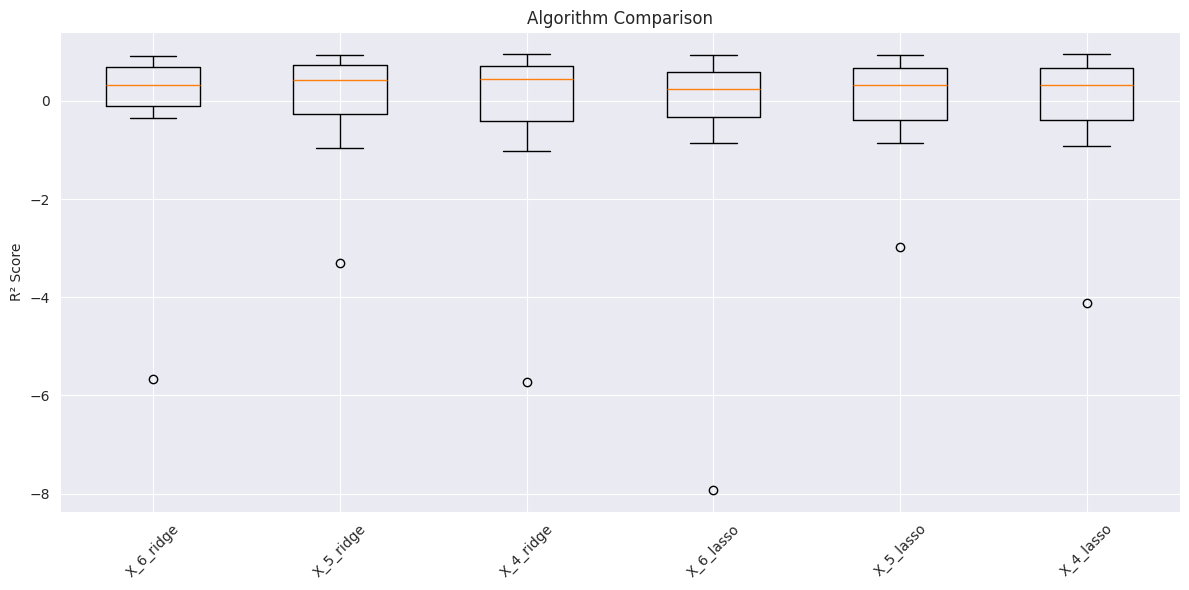


Best model: X_5_ridge with mean R² score of -0.0750

Coefficients for best model:
   Feature  Coefficient
1  Length1         91.2
2  Length2         90.9
4   Height         85.3
3  Length3         80.5
0  Species         21.1


In [63]:
models.clear()
models.append(('X_6_ridge', Ridge(alpha=ridge_alpha_6, max_iter=10000, tol=0.001), X_6))
models.append(('X_5_ridge', Ridge(alpha=ridge_alpha_5, max_iter=10000, tol=0.001), X_5))
models.append(('X_4_ridge', Ridge(alpha=ridge_alpha_4, max_iter=10000, tol=0.001), X_4))
models.append(('X_6_lasso', Lasso(alpha=lasso_alpha_6, max_iter=50000, tol=0.001, warm_start=True), X_6))
models.append(('X_5_lasso', Lasso(alpha=lasso_alpha_5, max_iter=50000, tol=0.001, warm_start=True), X_5))
models.append(('X_4_lasso', Lasso(alpha=lasso_alpha_4, max_iter=50000, tol=0.001, warm_start=True), X_4))
results = []
names = []

scoring = 'r2'
kfold = KFold(n_splits=10)

for name, model, X_data in models:
    cv_results = cross_val_score(model, X_data, Y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Create boxplot for model comparison
plt.figure(figsize=(12, 6))
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names, rotation=45)
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

means = [mean(result) for result in results]

best_model_index = means.index(max(means))
best_model_name, best_model, best_X = models[best_model_index]

print(f"\nBest model: {best_model_name} with mean R² score of {max(means):.4f}")
best_model.fit(best_X, Y1)

coefs = pd.DataFrame({'Feature': best_X.columns, 'Coefficient': best_model.coef_})
print("\nCoefficients for best model:")
print(coefs.sort_values('Coefficient', ascending=False))